<a href="https://colab.research.google.com/github/gitboku/statistics-practice/blob/master/%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ロジスティック回帰分析とは

目的変数を0から1の範囲でとりたいときに有効な分析方法。
例えば、癌の発生確率など。

## 非線形回帰とは

単回帰分析と重回帰分析は線警戒機。
非線形は直線ではない関係、例えば2上とかルートの関係。
ロジスティック回帰分析以外には多項式回帰分析とかサポートベクトル回帰分析などがある。

## 数式

参考：　https://mathwords.net/logitkansu

確率$p$で発生する事象AAについて、起こる確率と起こらない確率との比$\frac{p}{1-p}$をオッズという。
この対数を取ったもの$\log\frac{p}{1-p} = \log p\ -\ \log(1-p)$を対数オッズと呼ぶ。

ここで、$y = \log\frac{p}{1-p}$をロジット関数と呼ぶ。

このロジット関数の逆関数を取る。

$$
\begin{eqnarray}
y &=& \log\frac{p}{1-p}\\
e^y &=& \frac{p}{1-p}\\
e^y - e^yp &=& p\\
p &=& \frac{e^y}{e^y + 1} = \frac{1}{1 + e^{-y}}
\end{eqnarray}
$$

ここで、ロジット関数の逆関数をロジスティック関数と呼ぶ

ロジスティック回帰分析では以下の式を取る。

$$
p = \frac {1} {1+ \exp(-(a_1x_1 + \cdots + a_nx_n + b))}
$$

これを変形すると以下のようになる。

$$
\ln{\frac {p} {1-p}} = a_1x_1 + \cdots + a_nx_n + b
$$

なお、上のほうの式はシグモイド関数とも呼ばれる。

## 偏回帰係数の求め方

ロジスティック回帰分析では単回帰や重回帰のように最小二乗法で求めることはできないらしい。  

参考：　https://qiita.com/karaage0703/items/417934d82ac3c3c5f70e#%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%E3%81%AE%E8%A7%A3%E3%81%8D%E6%96%B9


よって、勾配降下法などを使用して逐次計算でパラメータ推定をする。

## 勾配降下法について

いくつかの種類がある。

*   最急降下法（Gradient Descent）
*   確率的勾配降下法（Stochastic Gradient Descent）
*   ミニバッチ確率的勾配降下法（Minibatch SGD）

計算量が少ない、オンライン学習が可能といったメリットから、たいていの場合確率的勾配降下法を使用するが、異常値に引っ張られやすい。

ミニバッチ法ではまとまったデータをいくつかの組に分けて確率的勾配降下法を行う。
全データを使用する回数のことをエポック数という。
例えば、データ数が1000で、ミニバッチのサイズが50の時、20回学習を行うと全データを1周するので、20反復が1エポックとなる。

エポック数が10なら10000のデータを使用する。ミニバッチサイズが50なので、200回学習することになる。

勾配の計算方法は以下の通りになる。
$y^*$は事象が発生する確率

$$
\begin{eqnarray}
\frac {\partial L}{\partial w} &=& -\displaystyle \sum_{n=1}^Nx_n(y - y^*)\\
\frac {\partial L}{\partial b} &=& -\displaystyle \sum_{n=1}^N(y - y^*)\\
\end{eqnarray}
$$

これらにそれぞれ学習率$\eta$を掛けた値を現在のパラメータから引いた値を新しいパラメータとして使用する

$$
\begin{eqnarray}
w &\leftarrow& w - \eta\frac {\partial L}{\partial w}\\
b &\leftarrow& b - \eta\frac {\partial L}{\partial b}
\end{eqnarray}
$$

# 実装

参考：　https://qiita.com/hkthirano/items/ff845d2385798d1aed44

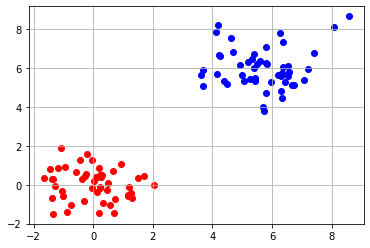

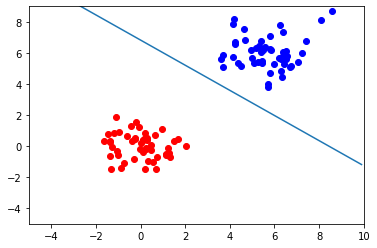

In [2]:
import numpy as np
import matplotlib.pyplot as plt

d = 2 # 次元数
N = 100 # データ数
x1 = np.random.randn(N // 2, d) # 適当な(N, d)のnumpy.ndarrayを作成
x2 = np.random.randn(N // 2, d) + np.array([6, 6]) # (6, 6)の座標の周りに別なデータを作成

x = np.vstack((x1, x2)) # 縦方向に結合する

label1 = np.zeros(N // 2) # 正解ラベルが0
label2 = np.ones(N // 2) # 不正解ラベルが1
label = np.hstack((label1, label2)) # 横に結合する

dataset = np.column_stack((x, label)) # hstackと似たような感じ
np.random.shuffle(dataset) # 順番をシャッフルする

X = dataset[:, :2] # 目的変数部分を取り出す。
label = dataset[:, 2] # 教師データ部分を取り出す。

plt.scatter(x1[:, 0], x1[:, 1], c='r')
plt.scatter(x2[:, 0], x2[:, 1], c='b')
plt.grid()
plt.show()
plt.close()

# シグモイド関数
def sigmoid(a):
  return 1.0 / (1.0 + np.exp(-a))

# 現在のパラメータにおける、ロジスティック回帰の予測値を返す関数
def logistic(x):
  return sigmoid(np.dot(x, w) + b)

# 勾配を返す関数
def grad(x, label):
  diff = label - logistic(x)
  w_grad = -logistic(x) * diff
  b_grad = -np.mean(diff)
  return w_grad, b_grad

w = np.random.rand(d)
b = np.random.random()

# 学習率
eta = 0.1

# 最急降下法で学習
index = 0
for row in X:
  w_grad, b_grad = grad(x[index], label[index])
  w -= eta * w_grad
  b -= eta * b_grad
  index += 1

# 回帰直線の確認
bx = np.arange(-6, 10, 0.1)
by = -b / w[1] - w[0] / w[1] * bx
plt.xlim([-5, 10])
plt.ylim([-5, 9])
plt.plot(bx, by)
plt.scatter(x1[:, 0], x1[:, 1], c='r')
plt.scatter(x2[:, 0], x2[:, 1], c='b')
plt.show()
plt.close()

# scikit-learnで実装

参考：　https://qiita.com/0NE_shoT_/items/b702ab482466df6e5569

`seaborn`とは、matplotlibをもっと扱いやすく、簡単にきれいな図が描けるようにしたラッパーライブラリである。

## データ用意

In [2]:
import seaborn as sns
iris_df = sns.load_dataset('iris') # データセットの読み込み

iris_test = list(set(iris_df))
print(iris_test)

iris_df = iris_df[(iris_df['species']=='versicolor') | (iris_df['species']=='virginica')] # 簡単のため、2品種に絞る
iris_df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['sepal_length', 'sepal_width', 'petal_width', 'species', 'petal_length']


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


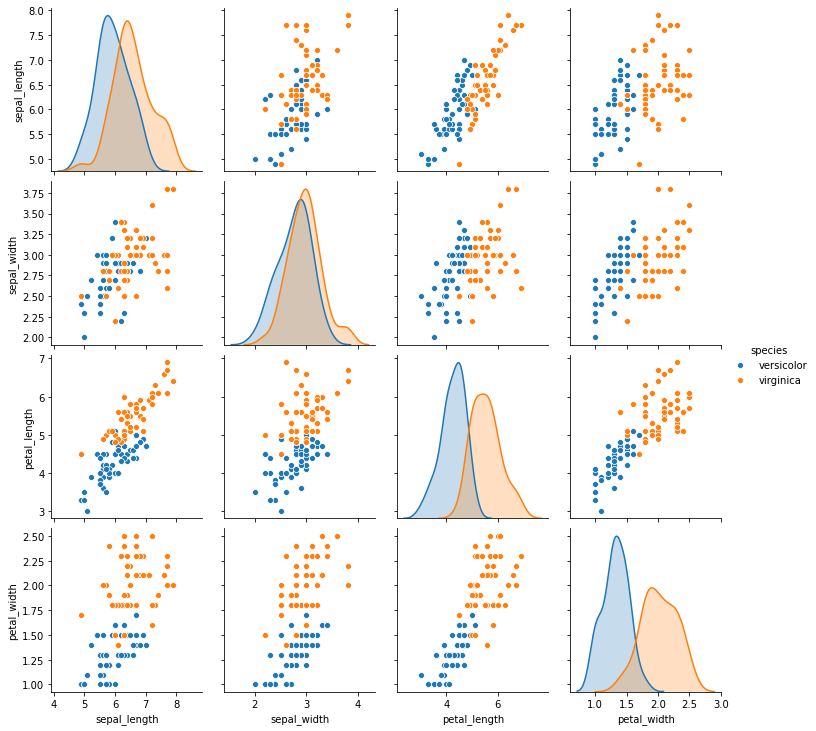

In [3]:
import matplotlib.pyplot as plt
sns.pairplot(iris_df, hue='species')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X = iris_df[['petal_length']] # 説明変数
Y = iris_df['species'].map({'versicolor': 0, 'virginica': 1})

print('Y.shape =', Y.shape, "\nY =", Y)

# test_size -> 20%をテストデータに使う
# random_state -> 乱数生成に使われる。数字を指定することでモデルの再現性を担保できる。
# 順番は自動でシャッフルされる
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Y.shape = (100,) 
Y = 50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64


## 学習

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # ロジスティック回帰分析のインスタンス
lr.fit(X_train, Y_train) # パラメータ学習

print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[3.43226939]]
intercept =  [-16.54483764]


## 推測

In [27]:
Y_pred = lr.predict(X_test)
for i in range(20):
  print(Y_pred[i], end='')
print("\n")
for row in Y_test:
  print(row, end='')

01111101111110001010

01011101111110000000